# Tutorial: sample dataset

In this chapter we are going to analyze the [Chocolate Bar Ratings](https://www.kaggle.com/datasets/evangower/chocolate-bar-ratings) dataset. It contains ratings for over 2,500 chocolate bars from around the world with corresponding properties, e.g.: bean origin, cocoa content or number of ingredients. To get familiar with all teh available variables, head to the provided link and read the short introduction to the data. 

Our main focus will be to find the factors that affect the rating of those chocolate bars. To this end, we will use a combination of tools described in the previous chapters, which will, hopefully, allow you to practice a little what you've learnt so far.

## Environment setup

In [ ]:
# for Google Colab
import os
if 'COLAB_JUPYTER_IP' in os.environ:
    !git clone https://github.com/bokulich-lab/DataVisualizationBook.git book

    from book.utils import utils
    utils.ensure_packages('book/requirements.txt')

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go

# this is to silence pandas' warnings
import warnings
warnings.simplefilter(action='ignore')

# for Google Colab
if 'COLAB_JUPYTER_IP' in os.environ:
    data_dir = 'book/chapters/data'
else:
    data_dir = 'data'
    
%matplotlib inline
%config InlineBackend.figure_format='svg'

# for plots' appereance
FONT_SCALE = 1.3
FONT_FAMILY = 'DejaVu Sans'

## Loading the data

Let's begin by loading the data and examining which columns/variables are available:

In [2]:
chocolate_dataset = pd.read_csv(f'{data_dir}/chocolate_bars.csv')
chocolate_dataset.columns

Index(['id', 'manufacturer', 'company_location', 'year_reviewed',
       'bean_origin', 'bar_name', 'cocoa_percent', 'num_ingredients',
       'ingredients', 'review', 'rating'],
      dtype='object')

As you can see, the dataset has 11 columns - here are the descriptions for all of them:
- **`id`** - is the ID of the review for the chocolate bar. 
- **`manufacturer`** - refers to the manufacturer of the chocolate bar. 
- **`company_location`** shows the location of the manufacturer. 
- **`year_reviewed`** - stands for the year of the review of the chocolate bar. 
- **`bean_origin`** - is the origin of the cocoa bean. 
- **`bar_name`** - stands for the name of the chocolate bar. 
- **`cocoa_percent`** - shows the cocoa percentage of the bars. 
- **`num_ingredients`** and **`ingredients`**  - show the [count of] ingredients of the chocolate bars. 
- **`review`** and **`rating`** - capture interviewees' opinions on the chocolate bars.

In [3]:
# check some of the columns
chocolate_dataset.head()[['manufacturer', 'company_location', 'bean_origin','rating']]

,manufacturer,company_location,bean_origin,rating
0,5150,U.S.A.,Tanzania,3.25
1,5150,U.S.A.,Dominican Republic,3.50
2,5150,U.S.A.,Madagascar,3.75
3,5150,U.S.A.,Fiji,3.00
4,5150,U.S.A.,Venezuela,3.00


In [4]:
countries = pd.read_csv(f'{data_dir}/country_coordinates.csv')
countries.head()

,bean_origin,latitude,longitude
0,Tanzania,-6.369028,34.888822
1,Dominican Republic,18.735693,-70.162651
2,Madagascar,-18.766947,46.869107
3,Fiji,-16.578193,179.414413
4,Venezuela,6.423750,-66.589730


## Data analysis

To ensure that the comparisons will be relevant, we will consider only the **top 30** manufacturers that have received the most ratings. It is not fair to compare a manufacturer that has received 5 ratings with one that has received 50 ratings. In other words, the average ratings of these two manufacturers may not lead to relevant insights. 

In [5]:
# find the top 30 companies with the most ratings
ratings_per_manufacturer = chocolate_dataset[['id', 'manufacturer']] \
    .groupby('manufacturer').count().reset_index() \
    .sort_values(by='id', ascending=False).iloc[:30,:]

# select the ratings for the manufacturers that have received the most
selection = chocolate_dataset['manufacturer'].isin(ratings_per_manufacturer['manufacturer'])
manufacturers_with_most_ratings = chocolate_dataset.loc[selection, :]

### Number of ratings per manufacturer

Let us start by checking how many ratings there are per manufacturer. This will help us get an insight later on when we compare the average ratings per manufacturer to see how relevant they will be.

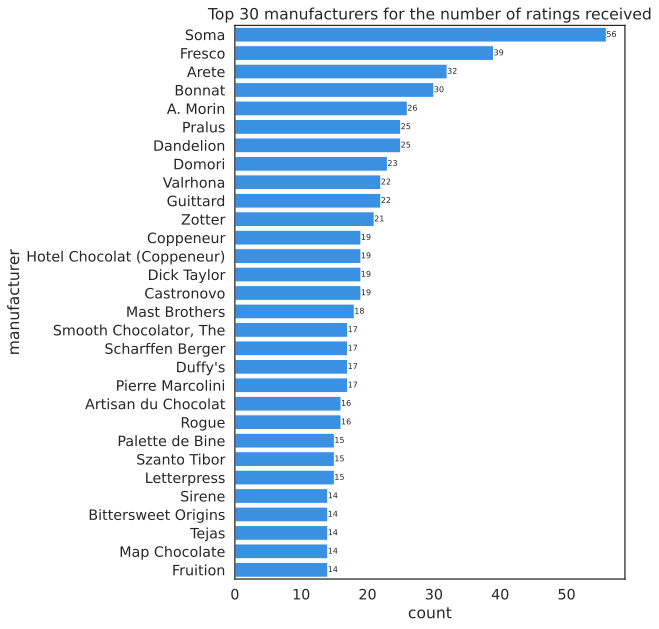

In [6]:
sns.set_theme(
    rc={'figure.figsize': (7, 10), 'font.family': [FONT_FAMILY]}, 
    style='white'
)
with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    # seaborn's countplot
    ax = sns.countplot(
        data=manufacturers_with_most_ratings,
        y='manufacturer',
        order=manufacturers_with_most_ratings['manufacturer'].value_counts().index,
        color='dodgerblue' 
    )

    # display the average for each manufacturer
    ax.bar_label(ax.containers[0], size=8)
    
    ax.set_title('Top 30 manufacturers for the number of ratings received')

### Average rating per manufacturer

Now, we can explore the distribution of ratings for every manufacturer using a `boxplot`.

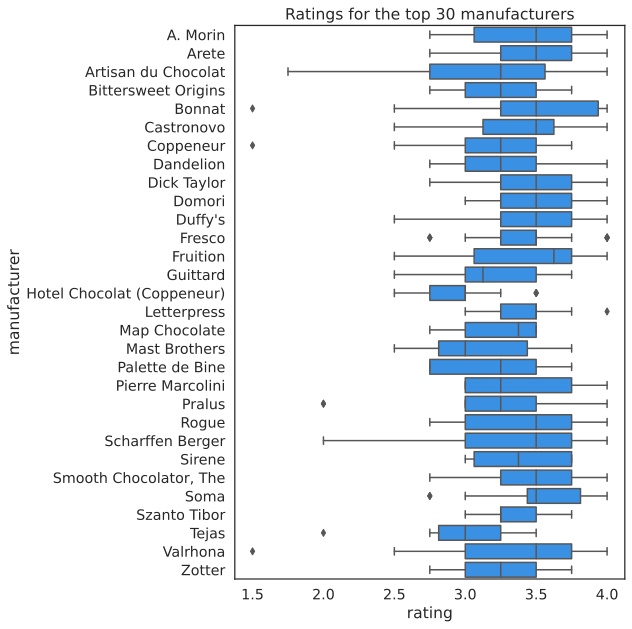

In [7]:
sns.set_theme(
    rc={'figure.figsize': (7, 10), 'font.family': [FONT_FAMILY]}, 
    style='white'
)
with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    # seaborn's boxplot
    ax = sns.boxplot(
        data=manufacturers_with_most_ratings,
        x='rating',
        y='manufacturer',
        color='dodgerblue'
    )
    
    ax.set_title('Ratings for the top 30 manufacturers')

### Distribution of ratings per location of most voted manufacturers

Similarly, we can look at the distribution of ratings per country where chocolate bars that received the most reviews came from. For a change, we can use a ridgeline plot:

In [8]:
# define a simple function to label the plot in axes coordinates
def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .2, label, fontweight="bold", color=color,
              ha="left", va="center", transform=ax.transAxes)

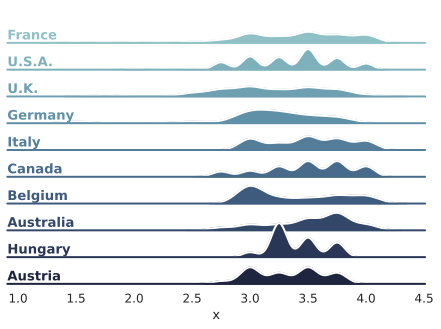

In [9]:
# plot distribution of ratings per location

data = manufacturers_with_most_ratings[['company_location', 'rating']]
g = data.iloc[:, 0] # country
x = data.iloc[:, 1] # rating
df = pd.DataFrame(dict(x=x, g=g))
    
sns.set_theme(
    style="white", 
    rc={"axes.facecolor": (0, 0, 0, 0), 'font.family': [FONT_FAMILY]}
)
with sns.plotting_context("notebook", font_scale=1.1):
    # initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

    # draw the densities in a few steps
    g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

    # passing color=None to refline() uses the hue mapping
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    g.map(label, "x")

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

### Average rating per bean origin

Let's now try to see whether the origin of beans has influence on the chocolate rating. We can use plot an average rating per bean origin using a world map - here, we will create an interactive visualization using the [plotly](https://plotly.com/) library.

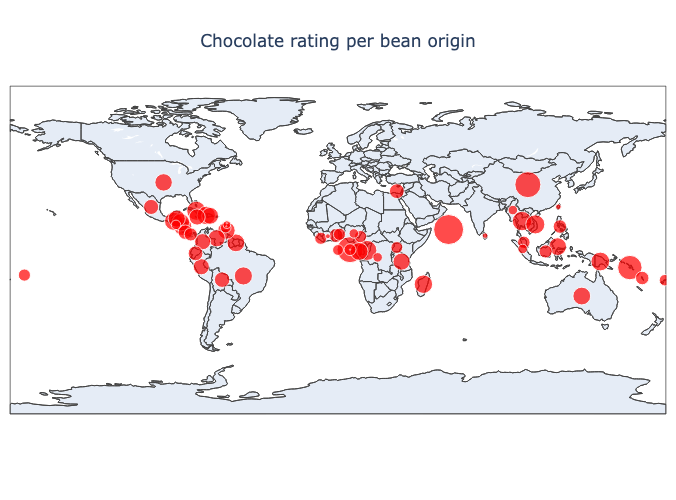

In [76]:
# find average rating per location
ratings_per_bean_origin = pd.merge(
    chocolate_dataset[['bean_origin', 'rating']], countries, on='bean_origin'
) .groupby(
    'bean_origin'
).mean().round(2).reset_index().sort_values(by='rating', ascending=False)

# normalize the ratings to better size the points
rating_min = ratings_per_bean_origin['rating'].min()
rating_max = ratings_per_bean_origin['rating'].max()
ratings_per_bean_origin['rating_normalized'] = \
    ratings_per_bean_origin['rating'].apply(
        lambda x: (x - rating_min) / (rating_max - rating_min)
    )

# plot on the map using plotly
fig = go.Figure(go.Scattergeo(
    lon=ratings_per_bean_origin.longitude,
    lat=ratings_per_bean_origin.latitude,
    text=[
        f'Country: {x.bean_origin}, Rating: {x.rating}' 
        for _, x in ratings_per_bean_origin.iterrows()
    ],
    marker={
        'size': 30*ratings_per_bean_origin.rating_normalized,
        'sizemode': 'diameter',
        'color': 'red',
    }
))

# configure the map layout
fig.update_layout(
    title = {
        'text': 'Chocolate rating per bean origin', 
        'x': 0.5, 'y': 0.93
    },
    width = 750,
    height = 500,
    margin = {'t': 10, 'b': 10, 'l': 10, 'r': 10}, 
    geo = {
        'showcountries': True, 'projection_type': 'equirectangular'
    }
)

### Correlogram of cocoa percentage, number of ingredients and rating

To get a quick glimpse into how some variables may be correlated with the others, we can use a _correlogram_. This kind of visualization tries to compare each numerical variable in the dataset with every other one, generating a large grid of scatter plots. Additionally, on the diagonal you will always find a histogram illustrating the distribution of a given variable.

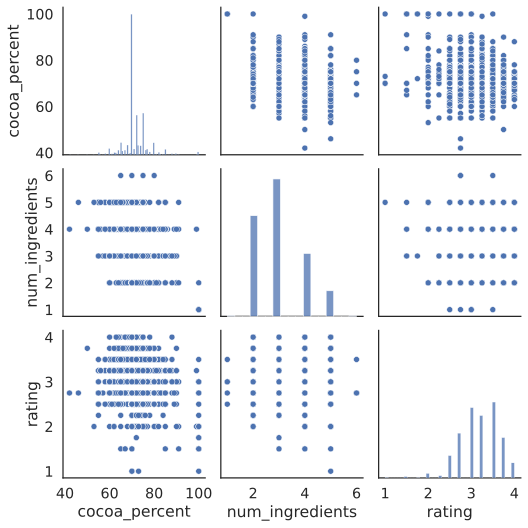

In [71]:
selected_data = chocolate_dataset[['cocoa_percent', 'num_ingredients','rating']]

sns.set_theme(
    rc={'figure.figsize':(6, 8), 'font.family': [FONT_FAMILY]}, 
    style='white'
)
with sns.plotting_context("notebook", font_scale=FONT_SCALE): 
    sns.pairplot(selected_data, kind="scatter", palette="Set2")

As you can see, there seems to be no correlation between any of the variables that were provided. Another way to get a more quantitative insight into potential correlations among variables is to visualize the correlation matrix as an annotated heat map. Conveniently, [pandas](https://pandas.pydata.org/) can automatically generate such a matrix for us through the [corr() method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html):

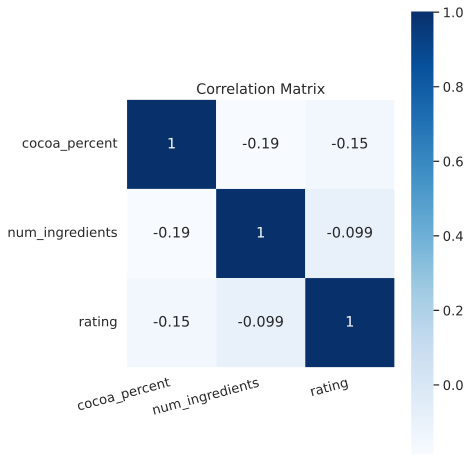

In [14]:
sns.set_theme(
    rc={'figure.figsize':(6, 8), 'font.family': [FONT_FAMILY]}, 
    style='white'
)
with sns.plotting_context("notebook", font_scale=1.2):
    correlation_matrix = selected_data.corr()
    ax = sns.heatmap(
        data=correlation_matrix, cmap='Blues',
        annot=True, square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=15,
        horizontalalignment='right'
    )
    ax.set_title('Correlation Matrix')

Again, as we saw on the scatter plots already, there seems to be very little to no correlation between any of the analyzed variables.

## Conclusion

This brings us to the end of this tutorial. We hope that after reviewing all the material included in this book you will feel more comfortable when generating your own visualizations in Python. Moreover, the final exercise in this chapter should have given you some ideas as to what you could look into when analyzing any dataset in the future. You can always use this book as a reference when plotting - do not hesitate, however, to explore other kinds of visualizations! Sometimes you may discover intersting insights into your own data by doing something slightly less conventional ;) Good luck!

In the last, and final, section you will find some exercises which should allow you to practice the concepts discussed in this book - have fun!